# Flight Fare Prediction 

While training the model, different aspects are importnant therefore we're going to perform below methods:

- Feature Selection
- Hyperparamter Tunning
- Modeol Building

## Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing preprocessed data 

# Train data
train = pd.read_csv('./processed_data/processed_trainData.csv')

# Test data
test = pd.read_csv('./processed_data/processed_testData.csv')

In [3]:
train.head()

,Unnamed: 0,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,...,Airline_Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,3897,24,3,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,1,2,7662,1,5,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2,2,13882,9,6,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,3,1,6218,12,5,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,4,1,13302,1,3,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


In [4]:
test.head()

,Unnamed: 0,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi.1,Hyderabad,Kolkata.1,New Delhi
0,0,1,6,6,17,30,4,25,10,55,...,0,0,1,0,0,1,0,0,0,0
1,1,1,12,5,6,20,10,20,4,0,...,0,0,0,1,0,0,0,0,0,0
2,2,1,21,5,19,15,19,0,23,45,...,0,0,1,0,0,1,0,0,0,0
3,3,1,21,5,8,0,21,0,13,0,...,0,0,1,0,0,1,0,0,0,0
4,4,0,24,6,23,55,2,45,2,50,...,0,0,0,0,0,0,1,0,0,0


In [5]:
# Let's check the shape and columns

train.shape

(10682, 31)

In [6]:
test.shape

(2671, 29)

In [7]:
train.columns

Index(['Unnamed: 0', 'Total_Stops', 'Price', 'Journey_day', 'Journey_month',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_Hours',
       'Duration_Mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [8]:
test.columns

Index(['Unnamed: 0', 'Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi.1', 'Hyderabad', 'Kolkata.1', 'New Delhi'],
      dtype='object')

In [9]:
# Unecessary column added to the dataset called "Unnamed: 0", let's drop that

train.drop(["Unnamed: 0"],axis=1, inplace=True)

In [10]:
train.shape

(10682, 30)

In [11]:
train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_Hours',
       'Duration_Mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [12]:
# Same for the test data

test.drop(["Unnamed: 0"], axis=1, inplace=True)
test.shape

(2671, 28)

In [13]:
test.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Cochin', 'Delhi.1', 'Hyderabad', 'Kolkata.1', 'New Delhi'],
      dtype='object')

Uneccesary column from both the datase had been dropped.

In [14]:
train.shape

(10682, 30)

In [15]:
test.shape

(2671, 28)

### Feature Selection
Finding out the best feature which will contribute and have good relation with target variable.

First of all let's check the correlation between independent and dependent attributes.

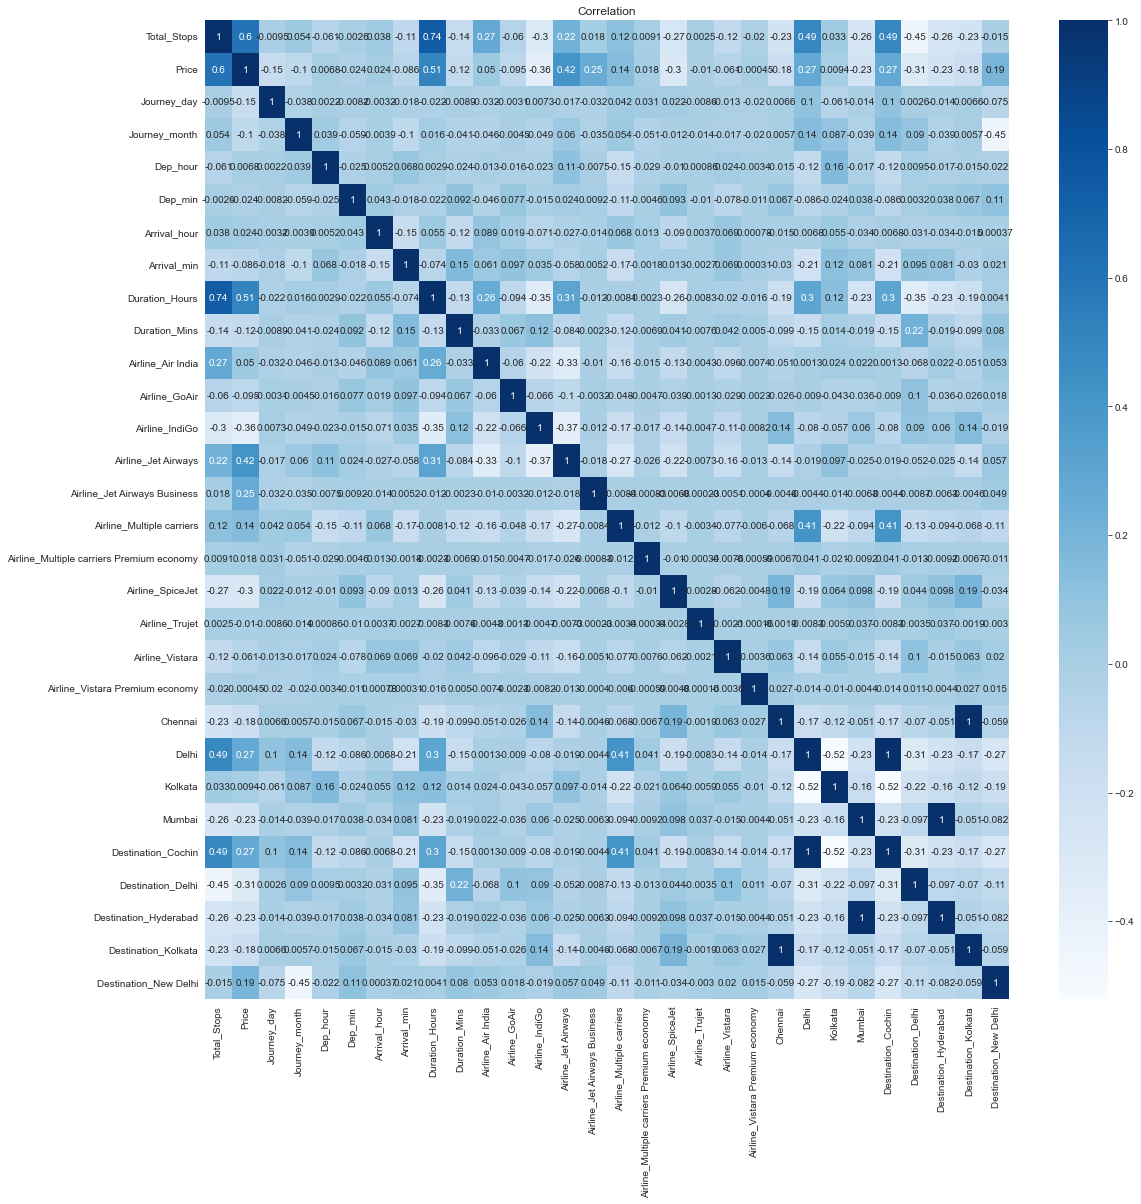

In [16]:
plt.figure(figsize=(18,18))
sns.heatmap(train.corr(), annot=True, cmap="Blues")
plt.title("Correlation")
plt.show()

Above graph showing us the correlation between columns of the train data.

### Sperating Independent and Dependend variables

In [17]:
X = train.drop(["Price"], axis=1)
X.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_Hours', 'Duration_Mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [18]:
y = train["Price"]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

Now we have a two variables **X** and **y** 

#### Important feature using ExtraTreesRegressor

 Extremely Randomized Trees (or Extra-Trees) is an ensemble learning method. The method creates extra trees randomly in sub-samples of datasets to improve the predictivity of the model. By this approach, the method reduces the variance. The method averages the outputs from the decision trees.

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

Let's check feature importance

In [20]:
print(selection.feature_importances_)

[2.51512386e-01 1.43510226e-01 5.38598896e-02 2.36481481e-02
 2.07209025e-02 2.81726362e-02 1.98207845e-02 1.11306114e-01
 1.76807117e-02 9.03243356e-03 2.14444134e-03 1.74862031e-02
 1.34243379e-01 6.72080469e-02 1.89986164e-02 8.21229366e-04
 3.49816212e-03 8.36314990e-05 5.03947765e-03 8.80785467e-05
 5.44258027e-04 8.85360617e-03 3.54177674e-03 5.60036303e-03
 8.48865691e-03 1.35014455e-02 5.76509706e-03 3.47508589e-04
 2.44817897e-02]


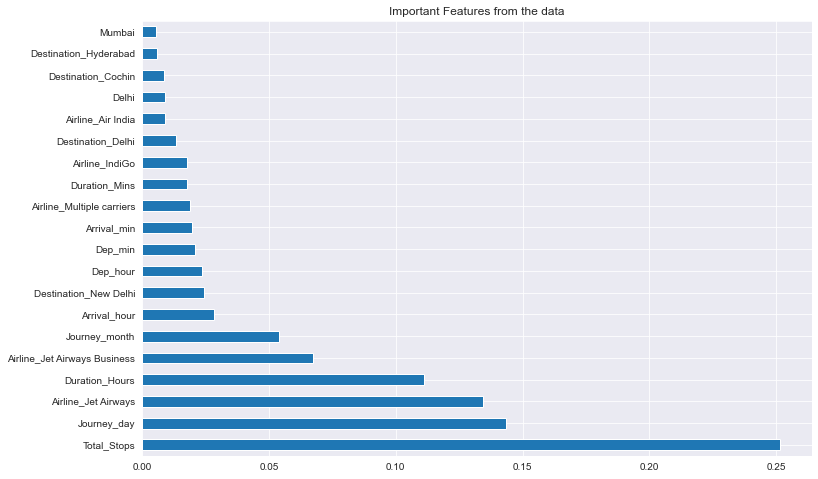

In [21]:
# Plot graph of feature importances for better visualization

plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Important Features from the data")
plt.show()

## Fitting model using Random Forest and XGBoost

1. Split dataset into train and test set 
2. Using two regression ML algorithms such as:
    - Random Forest Regression
    - XGBRegressor
3. Model Evaluation

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

- RandomForestRegressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
y_pred_rf = rf_reg.predict(X_test)

In [25]:
# Model Score on training set

rf_reg.score(X_train, y_train)

0.9527439550999949

In [26]:
# Model Score on testing set

rf_reg.score(X_test, y_test)

0.797518623187878

## Model evaluation with the help of visualization

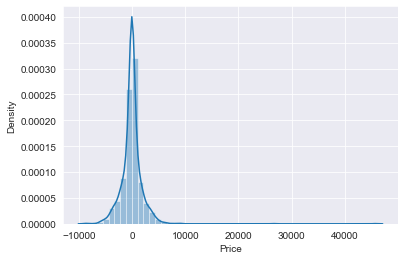

In [27]:
sns.distplot(y_test-y_pred_rf)
plt.show()

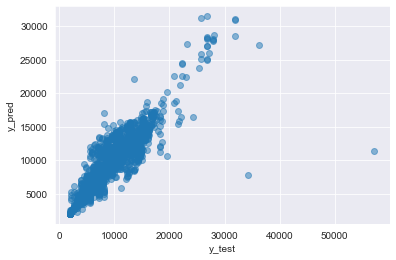

In [28]:
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Model Evaluation

In [29]:
from sklearn import metrics

In [30]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred_rf))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred_rf))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

MAE:  1177.073154938144
MSE:  4365914.8514168
RMSE:  2089.4771717864737


In [31]:
# r2_score

metrics.r2_score(y_test, y_pred_rf)

0.797518623187878

- XGBoostRegressor

In [32]:
from xgboost import XGBRegressor

xgbR = XGBRegressor()

xgbR.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
y_pred_xgb =  xgbR.predict(X_test)

In [34]:
# Model Score on training set

xgbR.score(X_train, y_train)

0.9353790824683148

In [35]:
# Model Score testing set

xgbR.score(X_test, y_test)

0.8463321179731759

## Model evaluation with the help of visualization

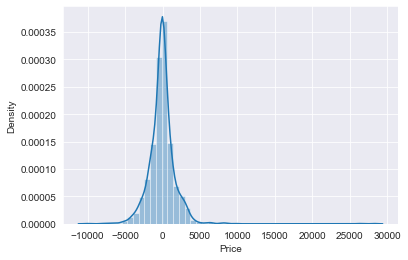

In [36]:
sns.distplot(y_test - y_pred_xgb)
plt.show()

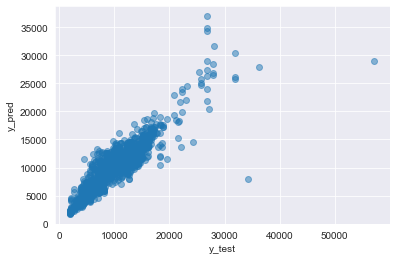

In [37]:
plt.scatter(y_test, y_pred_xgb, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [38]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred_xgb))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))

MAE:  1135.7739136142043
MSE:  3313395.5274770306
RMSE: 1820.2734760131596


In [39]:
# r2_score

metrics.r2_score(y_test, y_pred_xgb)

0.8463321179731759

# Hyperparameter Tunning

1. RandomizedSearchCV 
2. GridSearchCV 

From above 2 options RandomizedSearchCV is fast so for equality we can use this tunning method on both algorithms.

In [40]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [41]:
# RandomizedSearchCV on RandomForestRegressor

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop = 1200, num=12)]
# number of features to consider at even split
max_features = ['auto', 'sqrt']
# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [42]:
# create random grid

random_grid = {
                'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth' : max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf
}

In [43]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2)

In [44]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   5.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   4.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   4.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   5.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   4.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [45]:
# metrics.SCORERS.keys()

In [46]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [47]:
# xgboost with GridSearchCV

# xgbR.get_params()

In [48]:
#learning_rate 
# learning_rate = [0.001, 0.1, 0.002]

max_depth = [4,8,6]

n_estimators = [200, 300, 800]

n_jobs = [5,7]


In [49]:
xgb_grid = {
#             'base_score': base_score,
            'max_depth': max_depth,
            'n_estimators': n_estimators,
            'n_jobs': n_jobs
}

In [50]:
xgb_grid = GridSearchCV(estimator=xgbR, param_grid=xgb_grid, scoring='neg_mean_squared_error',cv=5, verbose=2)

In [51]:
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ............max_depth=4, n_estimators=200, n_jobs=5; total time=   1.4s
[CV] END ............max_depth=4, n_estimators=200, n_jobs=5; total time=   1.0s
[CV] END ............max_depth=4, n_estimators=200, n_jobs=5; total time=   1.0s
[CV] END ............max_depth=4, n_estimators=200, n_jobs=5; total time=   0.8s
[CV] END ............max_depth=4, n_estimators=200, n_jobs=5; total time=   0.8s
[CV] END ............max_depth=4, n_estimators=200, n_jobs=7; total time=   0.7s
[CV] END ............max_depth=4, n_estimators=200, n_jobs=7; total time=   0.7s
[CV] END ............max_depth=4, n_estimators=200, n_jobs=7; total time=   0.7s
[CV] END ............max_depth=4, n_estimators=200, n_jobs=7; total time=   0.6s
[CV] END ............max_depth=4, n_estimators=200, n_jobs=7; total time=   1.2s
[CV] END ............max_depth=4, n_estimators=300, n_jobs=5; total time=   5.5s
[CV] END ............max_depth=4, n_estimators=3

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [52]:
xgb_grid.best_params_

{'max_depth': 4, 'n_estimators': 300, 'n_jobs': 5}

In [53]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

### Trainig models with best params

In [54]:
# RandomForestRegressor with best parameters
randomForest = RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features='auto', max_depth=15)
randomForest.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=2)

In [55]:
# XGBoostRegressor with best parameters
xgbreg = XGBRegressor(max_depth=4, n_estimators=300, n_jobs=5)
xgbreg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=5, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
# creating a function that predict the score on X_train, X_test, y_train and y_test
def model_score(model):
    print("Score on training set: ")
    print(model.score(X_train, y_train))
    print("\nScore testing set: ")
    print(model.score(X_test, y_test))

In [57]:
print("Score of RandomForest Regressor: ")
model_score(randomForest)

Score of RandomForest Regressor: 
Score on training set: 
0.92417102132012

Score testing set: 
0.8185501177200228


In [58]:
print("Score of XGBRegressor: ")
model_score(xgbreg)

Score of XGBRegressor: 
Score on training set: 
0.9126053516737033

Score testing set: 
0.8526929881754246


## Parametrized mdoel tunning

1. RandomForestRegressor
2. XGBRegressor

In [59]:
y_pred_randomForest = randomForest.predict(X_test)

In [60]:
y_pred_xgbreg = xgbreg.predict(X_test)

Below function will return **MAE, MSE, RMSE and r2_Score**

In [61]:
def check_score(y_pred_model):
    print("MAE: ", metrics.mean_absolute_error(y_test, y_pred_model))
    print("MSE: ", metrics.mean_squared_error(y_test, y_pred_model))
    print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_model)))
    print("\nR2 Score: ")
    print(metrics.r2_score(y_test, y_pred_model))

Model Evaluation on **RandomForestRegressor**

In [62]:
check_score(y_pred_randomForest)

MAE:  1132.7302375364047
MSE:  3912432.581733392
RMSE: 1977.9870024177085

R2 Score: 
0.8185501177200228


Model Evaluation on **XGBRegressor**

In [63]:
check_score(y_pred_xgbreg)

MAE:  1167.0842419393607
MSE:  3176242.0859054616
RMSE: 1782.2014717493255

R2 Score: 
0.8526929881754246


## Report(observation):

 Above results gives us best observations for better model to predict flight fares
 
 **XGBRegressor** is the better option. It has low errors and pretty good r2_scoe than **RandomForestRegressor**

## Saving the best model

In [69]:
import pickle
# open a file, where you ant to store the data
file = open('flight_xgb.pkl', 'wb')

# dump information to that file
pickle.dump(xgbreg, file)

In [70]:
# Testing the model

model = open('flight_xgb.pkl','rb')
xgb = pickle.load(model)

In [72]:
xgb_saved_model = xgb.score(X_test, y_test)
print(xgb_saved_model)

0.8526929881754246


# Next step is to build a flask app